In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

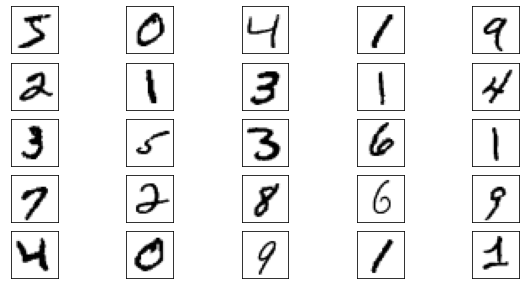

In [3]:
# завантаження набору даних MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

# вивід картинок
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [60]:
# створення моделі нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Перетворення матриці 28x28 у вектор
    layers.Dense(128, activation='relu'),  # Повнозв'язний шар з активацією ReLU
    layers.Dropout(0.2),  # Dropout для уникнення перенавчання
    layers.Dense(10, activation='softmax')  # Вихідний шар з активацією softmax для класифікації
])

# компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
# Тренування моделі

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
#model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nТочність на тестовому наборі:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2950 - accuracy: 0.9144 - val_loss: 0.1359 - val_accuracy: 0.9600
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9577 - val_loss: 0.1015 - val_accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1062 - accuracy: 0.9679 - val_loss: 0.0833 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.0836 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.0747 - val_accuracy: 0.9774
313/313 - 1s - loss: 0.0747 - accuracy: 0.9774 - 502ms/epoch - 2ms/step

Точність на тестовому наборі: 0.977400004863739


1/1 [==============================] - 0s 51ms/step
[[1.5143515e-09 6.6031375e-06 9.9992418e-01 6.8771566e-05 1.5110583e-18
  2.6980340e-08 4.2043098e-11 2.0546906e-12 3.3323823e-07 5.4521376e-14]]


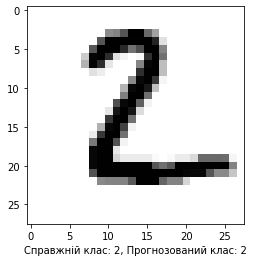

In [62]:
# візуалізація результатів класифікації
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.xlabel(f"Справжній клас: {y_test[n]}, "
           f"Прогнозований клас: {np.argmax(res) }")
plt.show()

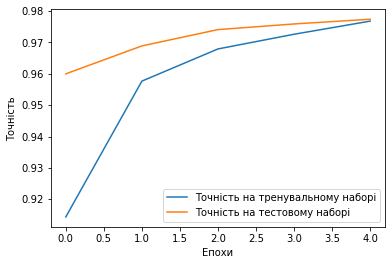

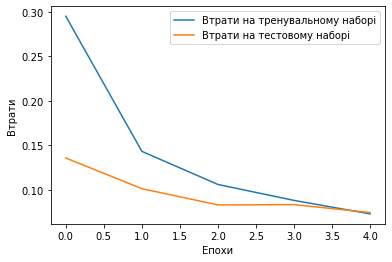

In [63]:
# Графіки точності
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на тестовому наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Графіки втрат
plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на тестовому наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()